In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import glob

In [17]:
#Use at the end
src_base = cv2.imread(raw_input("Please enter the path to the image to compare: "),0)
src_base_hist = cv2.calcHist([src_base], [0] ,None,[256],[0,256])
comparisonMethod = 0
print "Please choose a comparison method by typing the corresponding integer" 
print "1: Correlation"
print "2: Chi-Square"
print "3: Intersection"
print "4: Bhattacharyya"
while (True):
    try:
        comparisonMethod = int(raw_input("Type an integer 1-4: "))
        if(comparisonMethod == 1):
            Method = cv2.HISTCMP_CORREL
            break
        elif(comparisonMethod == 2):
            Method = cv2.HISTCMP_CHISQR
            break
        elif(comparisonMethod == 3):
            Method = cv2.HISTCMP_INTERSECT
            break
        elif(comparisonMethod == 4):
            Method = cv2.HISTCMP_BHATTACHARYYA
            break
    except ValueError:
        print "Not valid input, try again."
        

#Load source images
#src_base = cv2.imread(ImageToCompare, 0)
#src_test1 = cv2.imread("/Users/michaelmcquade/Desktop/Mei1.jpg", 0)
#src_test2 = cv2.imread("/Users/michaelmcquade/Desktop/Mei2.jpg", 0)
#Convert to RGB
#src_base = cv2.cvtColor(src_base, cv2.COLOR_BGR2RGB)

#Create HSV Versions (Convert them to HSV format)
#hsv_base = cv2.cvtColor(src_base, cv2.COLOR_RGB2HSV)
#hsv_test1 = cv2.cvtColor(src_test1, cv2.COLOR_BGR2HSV)
#hsv_test2 = cv2.cvtColor(src_test2, cv2.COLOR_BGR2HSV)

#Create half down hsv (Also, create an image of half the base image (in HSV format))
#(baseH,baseW) = src_base.shape[:2]
#src_half_down = src_base[baseH/2:]

Please enter the path to the image to compare: /Users/michaelmcquade/Desktop/DataBase_1/8D5U5524.tif
Please choose a comparison method by typing the corresponding integer
1: Correlation
2: Chi-Square
3: Intersection
4: Bhattacharyya
Type an integer 1-4: 2


In [18]:
##stack base and hsv 
#res = np.hstack((src_base,hsv_base))
#plt.imshow(res)
##Show base with no transformation
#plt.imshow(src_base, cmap='gray')
##show hsv base
#plt.imshow(src_base, cmap='gray')
##show half of hsv
#plt.imshow(src_half_down, cmap='gray')

#Initialize the arguments to calculate the histograms (bins, ranges and channels H and S ).

#h_bins, s_bins = 50, 60
#hranges, sranges = [0, 160],[0,256]
#ranges = [hranges, sranges]

#src_base_hist = cv2.calcHist([src_base], [0] ,None,[256],[0,256])
#src_base_hist1 = cv2.calcHist([src_base], [1] ,None,[256],sranges)
#src_base_hist2 = cv2.calcHist([src_base], [2] ,None,[256],sranges)

#src_test1_hist = cv2.calcHist([src_test1], [0] ,None,[256],sranges)
#src_test2_hist = cv2.calcHist([src_test2], [0] ,None,[256],sranges)
#src_half_down_hist = cv2.calcHist([src_half_down], [0] ,None,[256],sranges)

#plt.plot(src_base_hist)
#plt.plot(src_half_down_hist)
#cv2.compareHist(src_base_hist, src_half_down_hist, cv2.HISTCMP_CORREL)

#plt.imshow(src_base,cmap='gray')

In [19]:
imagesDB = glob.glob("/Users/michaelmcquade/Desktop/DataBase_1/*.tif")

In [20]:
#imagesDB
current = imagesDB[0]
tempIMG = cv2.imread(current, 0)
tempHIST = cv2.calcHist([tempIMG], [0], None, [256], [0,256])
#imagesDB[0] = [current, tempHIST]
Value = cv2.compareHist(src_base_hist, tempHIST, Method)
#Value
#print cv2.normalize(tempHIST, 1)

In [21]:
def generateValues(srcHist, imagesDB):
    for x in range(len(imagesDB)):
        current = imagesDB[x]
        tempIMG = cv2.imread(current, 0)
        tempHIST = cv2.calcHist([tempIMG], [0], None, [256], [0,256])
        Value = cv2.compareHist(srcHist, tempHIST, Method)
        imagesDB[x] = [current, Value]
    
    if (Method == cv2.HISTCMP_CORREL):
        imagesDB = sorted(imagesDB, key=lambda value: value[1], reverse=True)
    elif (Method == cv2.HISTCMP_CHISQR):
        imagesDB = sorted(imagesDB, key=lambda value: value[1])
    elif (Method == cv2.HISTCMP_INTERSECT):
        imagesDB = sorted(imagesDB, key=lambda value: value[1], reverse=True)
    elif (Method == cv2.HISTCMP_BHATTACHARYYA):
        imagesDB = sorted(imagesDB, key=lambda value: value[1])
    return imagesDB

In [22]:
imagesDB = generateValues(src_base_hist, imagesDB)

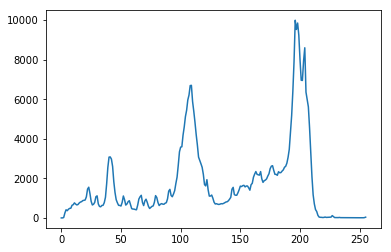

In [23]:
plt.plot(src_base_hist)

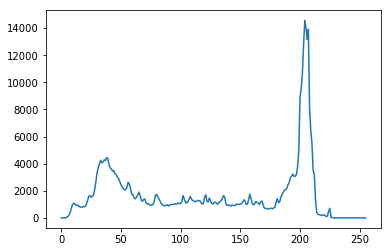

In [24]:
tempIMG = cv2.imread("/Users/michaelmcquade/Desktop/DataBase_1/8D5U5533.tif",0)
tempHIST = cv2.calcHist([tempIMG], [0], None, [256], [0,256])
plt.plot(tempHIST)


In [25]:
file = open("/Users/michaelmcquade/Desktop/Exam1Output.txt", "w")
for x in range(len(imagesDB)):
    tempValue = str(imagesDB[x][1])
    tempPath = str(imagesDB[x][0])
    print >>file, str("Value: " + tempValue + " " + "File: " + tempPath)
    

In [11]:
#def comparer(source, comparisonMethod):
#    Value = compareHist(source, DATABASEIMG, comparisonMethod)
#    if (comparisonMethod == cv2.HISTCMP_CORREL):
#        
#    elif (comparisonMethod == cv2.HISTCMP_CHISQR):
#        
#    elif (comparisonMethod == cv2.HISTCMP_INTERSECT):
#        
#    elif (comparisonMethod == cv2.HISTCMP_BHATTACHARYYA):
        
